# Preprocesamiento de datos
 Se probará los siguientes metodos:
 - oversampling
 - undersampling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Lectura de la base de datos

In [3]:
df = pd.read_csv("../base_datos/data.csv")
df.head()

,EDAD,SEXO,HTA,DM,DLP,TABACO,ENF CORON,ARRITMIA,PROT VALV,DX. PREV ICC,...,HOSP/AÑO,CONDIC ALTA,DÍAS HZADO,REINGRESO,IECA,ARAs,BETABLOQ,ESPIRONOLACT,FUROSEMIDA,DIGOXINA
0,85,0,0,0,0,0,1,0,1,0,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0
1,91,1,1,0,0,0,1,1,0,1,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1
2,78,0,1,1,1,0,0,0,0,0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0
3,88,0,1,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0
4,81,1,1,1,0,0,1,1,0,1,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0


In [4]:
df.columns

Index(['EDAD', 'SEXO', 'HTA', 'DM ', 'DLP', 'TABACO', 'ENF CORON', 'ARRITMIA',
       'PROT VALV', 'DX. PREV ICC', 'I. RENAL', 'ANEMIA', 'NYHA', 'IY', 'FC',
       'FR', 'CREPITOS', 'EDEMAS', 'RX TORAX', 'EKG', 'GLUC i', 'UREA i',
       'CREAT i', 'PRO BNP i', 'HB i', 'Na i', 'FE %', 'COMPLICAC', 'HOSP/AÑO',
       'CONDIC ALTA', 'DÍAS HZADO', 'REINGRESO', 'IECA', 'ARAs', 'BETABLOQ',
       'ESPIRONOLACT', 'FUROSEMIDA', 'DIGOXINA'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EDAD          1075 non-null   int64  
 1   SEXO          1075 non-null   int64  
 2   HTA           1075 non-null   int64  
 3   DM            1075 non-null   int64  
 4   DLP           1075 non-null   int64  
 5   TABACO        1075 non-null   int64  
 6   ENF CORON     1075 non-null   int64  
 7   ARRITMIA      1075 non-null   int64  
 8   PROT VALV     1075 non-null   int64  
 9   DX. PREV ICC  1075 non-null   int64  
 10  I. RENAL      1074 non-null   float64
 11  ANEMIA        1072 non-null   float64
 12  NYHA          940 non-null    float64
 13  IY            1067 non-null   float64
 14  FC            1070 non-null   float64
 15  FR            1060 non-null   float64
 16  CREPITOS      1069 non-null   float64
 17  EDEMAS        1069 non-null   float64
 18  RX TORAX      1054 non-null 

<Figure size 640x480 with 0 Axes>

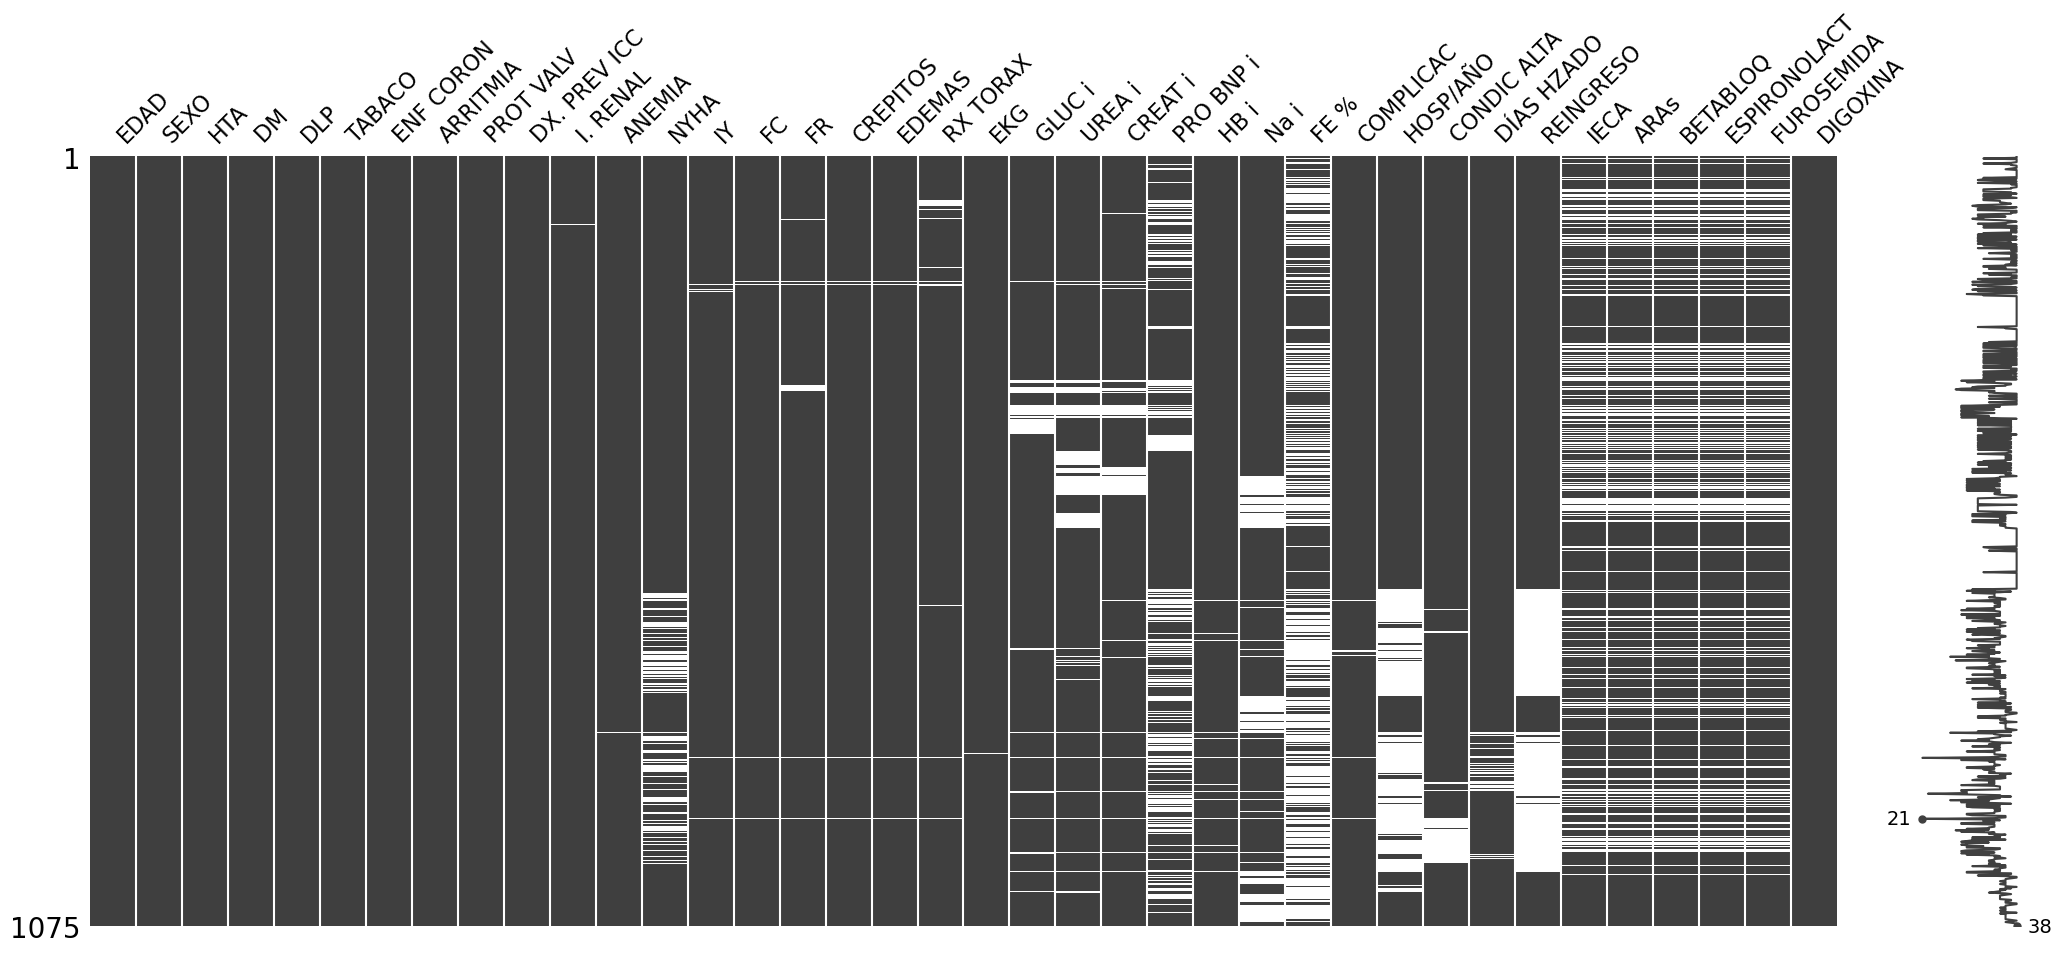

In [5]:
plt.figure()
msno.matrix(df)
plt.savefig("NN_db.png")

In [6]:
df["CONDIC ALTA"].unique()

array([ 1.,  0., nan,  2.])

## Reemplazamos el valor 2 del target por el valor 1

In [7]:
df["CONDIC ALTA"] = df["CONDIC ALTA"].replace({2:1})

In [8]:
df["CONDIC ALTA"].value_counts(dropna=False)

1.0    931
0.0     72
NaN     72
Name: CONDIC ALTA, dtype: int64

### Gráfica para ver si esta balanceada el dataset

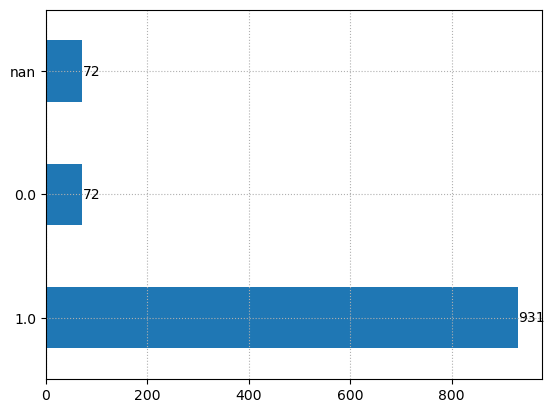

In [9]:
ax = df["CONDIC ALTA"].value_counts(dropna=False).plot(kind="barh")
ax.grid(ls=":")

for bars in ax.containers:
    ax.bar_label(bars)

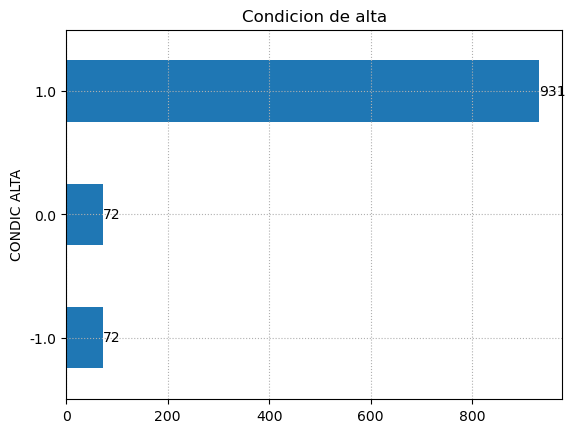

In [10]:
plt.title("Condicion de alta")
ax = df.fillna(-1).groupby(["CONDIC ALTA"])["CONDIC ALTA"].count().plot(kind="barh")
ax.grid(ls=":")

for bars in ax.containers:
    ax.bar_label(bars)

In [11]:
df["CONDIC ALTA"].isnull().sum()

72